# Expectativa de vida e PIB

Este projeto irá investigar se existe uma forte correlação entre a produção económica de um país e a expectativa de vida dos seus cidadãos.

Os objetivos são preparar os dados, seguidos de análise com gráficos, e buscar explicar os resultados do estudo.

Algumas perguntas que este projeto procurará responder:

+ A expectativa de vida aumentou ao longo do tempo nas seis nações?
+ O PIB aumentou ao longo do tempo nas seis nações?
+ Existe uma correlação entre o PIB e a expectativa de vida de um país?
+ Qual é a expectativa média de vida nestas nações?
+ Qual é a distribuição dessa expectativa de vida?

**Fontes de dados**

- Fonte do PIB: dados de contas nacionais do [Banco Mundial](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) e arquivos de dados de contas nacionais da OCDE.

- Fonte de dados sobre expectativa de vida: [Organização Mundial da Saúde](http://apps.who.int/gho/data/node.main.688)

### Importação de bibliotecas

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Carregar dataset

In [34]:
# Carregando o df e exibindo completo
df = pd.read_csv("./all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Tratamento dos dados

In [35]:
# Renomeando as colunas para pt-br
df.rename(columns={
    "Country" : "País",
    "Year" : "Ano",
    "Life expectancy at birth (years)" : "EV",
    "GDP" : "PIB"
    },
    inplace=True
)
    
# Criando uma nova coluna para vizualizar PIB melhor
df["PIB_Bi"] = (df["PIB"]/1e9).round(2)

# Exibindo df com alteracoes
df.head()

,País,Ano,EV,PIB,PIB_Bi
0,Chile,2000,77.3,7.786093e+10,77.86
1,Chile,2001,77.3,7.097992e+10,70.98
2,Chile,2002,77.8,6.973681e+10,69.74
3,Chile,2003,77.9,7.564346e+10,75.64
4,Chile,2004,78.0,9.921039e+10,99.21


In [36]:
# Informacoes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   País    96 non-null     object 
 1   Ano     96 non-null     int64  
 2   EV      96 non-null     float64
 3   PIB     96 non-null     float64
 4   PIB_Bi  96 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.9+ KB


In [37]:
# Explorando os valores das colunas "País" e "Ano"
paises = df["País"].unique()
anos = df["Ano"].unique()

print(f"""Valores da coluna:
- País = {paises}
- Ano = {anos}
""")

Valores da coluna:
- País = ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
- Ano = [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]



In [38]:
# Descricoes estatisticas
df.describe()

,Ano,EV,PIB,PIB_Bi
count,96.000000,96.000000,9.600000e+01,96.000000
mean,2007.500000,72.789583,3.880499e+12,3880.498542
std,4.633971,10.672882,5.197561e+12,5197.561333
min,2000.000000,44.300000,4.415703e+09,4.420000
25%,2003.750000,74.475000,1.733018e+11,173.305000
50%,2007.500000,76.750000,1.280220e+12,1280.220000
75%,2011.250000,78.900000,4.067510e+12,4067.510000
max,2015.000000,81.000000,1.810000e+13,18100.000000


In [39]:
# Quantidade de duplicatas
df.duplicated().sum()

0

In [40]:
# Quantidade de valores ausentes para cada coluna
df.isnull().sum()

País      0
Ano       0
EV        0
PIB       0
PIB_Bi    0
dtype: int64

**Nota**:

O arquivo "all_data.csv" fornecido consiste em 4 colunas como segue:
+ País - um país observado
+ Ano - os anos registrados variaram de 2000 a 2015
+ EV - a expectativa de vida das pessoas estimada ao nascer
+ PIB - produto interno bruto que é uma das medidas do crescimento da economia

Além disso, o dataset não apresenta dados ausentes nem duplicados. Apenas foi realizado um tratamento para facilitar a leitura dos dados, que incluiu a troca dos nomes das colunas para português com abreviações e a adição de uma coluna com o valor do PIB em bilhões.

### Média entre EV e PIB
Dúvida: Quanto é o PIB médio e a expectativa de vida de todos os países ?

In [41]:
tab_media_ev_pib = df.drop(["Ano", "PIB"], axis=1).groupby("País").mean().reset_index()
print(tab_media_ev_pib.round(2))


                       País     EV    PIB_Bi
0                     Chile  78.94    169.79
1                     China  74.26   4957.71
2                   Germany  79.66   3094.78
3                    Mexico  75.72    976.65
4  United States of America  78.06  14075.00
5                  Zimbabwe  50.09      9.06


De acordo com a tabela acima, observa-se que a maioria dos países apresenta uma expectativa de vida média entre 74 e 78 anos, com PIBs variando de 169 bilhões a 14 trilhões de dólares. O único país fora dessa faixa é o _Zimbabwe_, que tem a expectativa de vida mais baixa, de 50 anos, e um PIB de apenas 9 bilhões de dólares.

### Visualização de dados
Para comparar a diferença entre o PIB e a expectativa de vida dos países, 
todos os gráficos foram desenvolvidos da seguinte forma:
- EV média de cada país (gráfico de barras)
- PIB médio (B) de cada país (gráfico de barras)
- PIB durante 2000-2015 (gráfico de linhas)
- EV ao nascer durante 2000-2015 (gráfico de linhas)
- PIB e EV entre 2000-2015 (gráficos de dispersão)

In [42]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = (100)

**Expectativa de vida média por País**

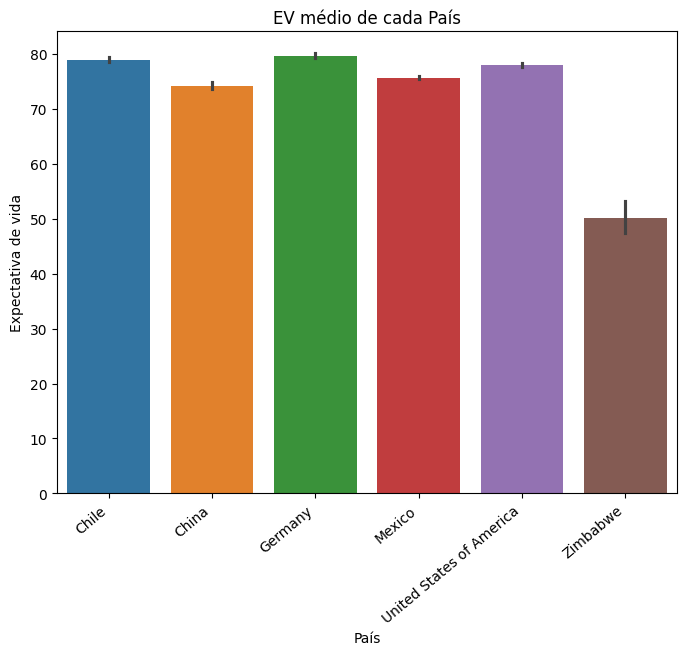

In [43]:
g = sns.barplot(data=df, 
                x="País", 
                y="EV", 
                hue="País", 
                palette="tab10", 
                estimator=np.mean, 
                legend=False)
g.set_title("EV médio de cada País")
g.set_xlabel("País")
g.set_ylabel("Expectativa de vida")
g.set_xticks(range(len(df["País"].unique())))
g.set_xticklabels(df["País"].unique(), rotation=40, ha='right')
plt.show()

Conforme o gráfico acima, podemos observar que a menor expectativa de vida é em _Zimbábue_, com 50 anos. Já os demais 
países apresentam expectativas de vida próximas entre si, sendo _Germany_ a mais alta, com 79 anos.

**PIB médio (usd) por País**

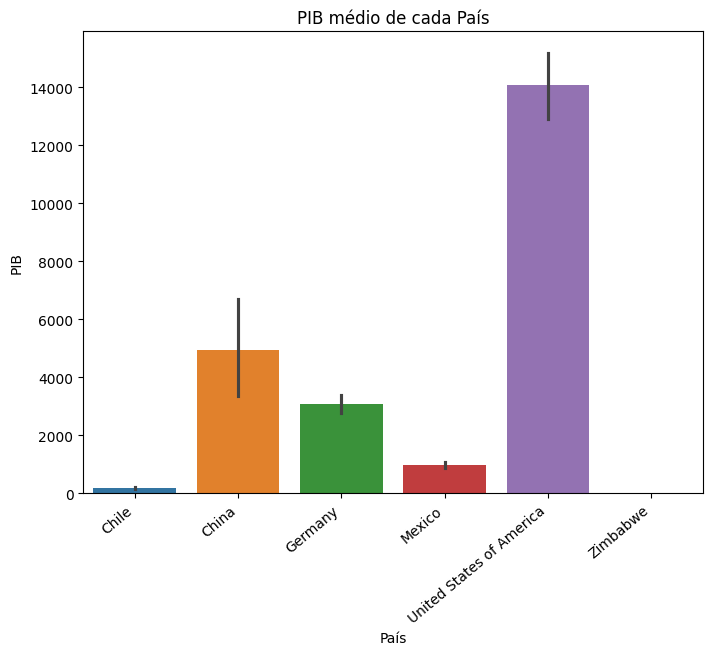

In [44]:
g = sns.barplot(data=df, 
                x="País", 
                y="PIB_Bi", 
                hue="País", 
                palette="tab10", 
                estimator=np.mean, 
                legend=False)
g.set_title("PIB médio de cada País")
g.set_xlabel("País")
g.set_ylabel("PIB")
g.set_xticks(range(len(df["País"].unique())))
g.set_xticklabels(df["País"].unique(), rotation=40, ha='right')
plt.show()

O gráfico acima mostra que os EUA têm o maior PIB entre os países analisados, enquanto o Zimbabwe apresenta o menor PIB.

**PIB durante 2000-2015 de cada País**

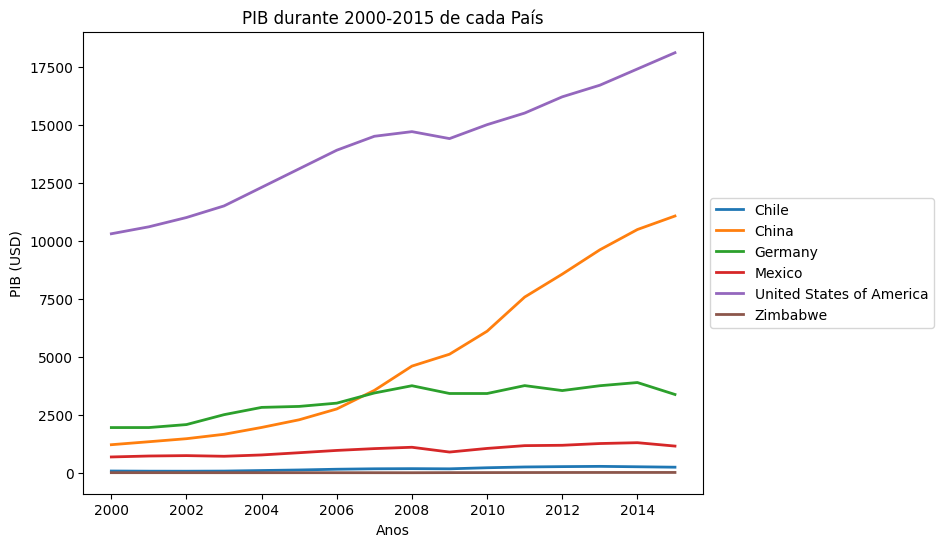

In [45]:
g = sns.lineplot(data=df,
                 x="Ano",
                 y="PIB_Bi",
                 hue="País",
                 palette="tab10",
                 linewidth=2)
g.set_title("PIB durante 2000-2015 de cada País")
g.set_xlabel("Anos")
g.set_ylabel("PIB (USD)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Conforme o gráfico acima, observamos que os _EUA_ apresentam um crescimento constante do PIB ao longo dos anos, com uma 
diferença significativa em relação a outros países. A China começa a apresentar crescimento a partir de 2008, enquanto 
os demais países mostram um crescimento relativamente plano.

**EV durante 2000-2015 de cada País**

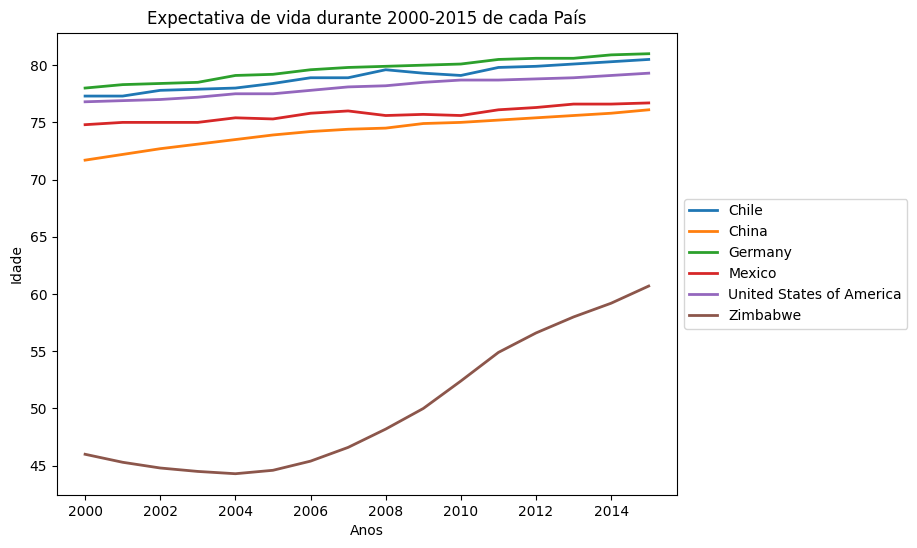

In [46]:
g = sns.lineplot(data=df,
                 x="Ano",
                 y="EV",
                 hue="País",
                 palette="tab10",
                 linewidth=2)
g.set_title("Expectativa de vida durante 2000-2015 de cada País")
g.set_xlabel("Anos")
g.set_ylabel("Idade")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Comparando os gráficos de linha do PIB e da expectativa de vida acima, fica mais claro que, com exceção do _Zimbabwe_, a maioria dos países apresentou tendências muito semelhantes na expectativa de vida (entre 72 e 80 anos), apesar das variações em seus PIBs. Além disso, a China, cujo PIB aumentou rapidamente e superou o PIB dos outros países desde 2008, apresentou uma expectativa de vida um pouco menor do que a de outros países, excluindo o _Zimbabwe_.

No entanto, a expectativa de vida no _Zimbabwe_ cresceu de forma acentuada desde 2005. Em 2000, a expectativa de vida era de apenas 46 anos. Em 2004, caiu para 44 anos antes de se recuperar e subir para quase 60 anos em 2015.

**Correlação entre PIB e EV**

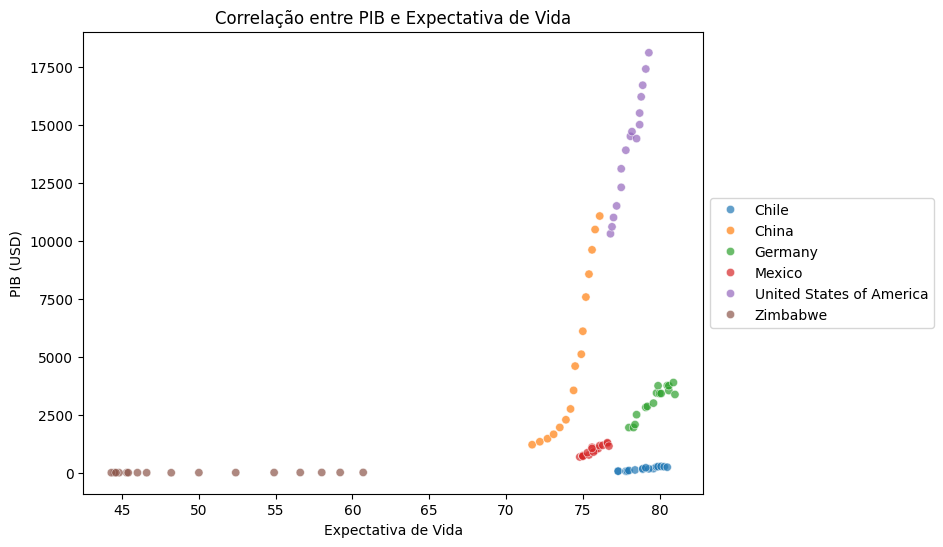

In [47]:
g = sns.scatterplot(data=df,
                    x="EV",
                    y="PIB_Bi",
                    hue="País",
                    palette="tab10",
                    alpha=0.7)
g.set_title("Correlação entre PIB e Expectativa de Vida")
g.set_xlabel("Expectativa de Vida")
g.set_ylabel("PIB (USD)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


**Correlação entre PIB e EV de cada País separadamente**

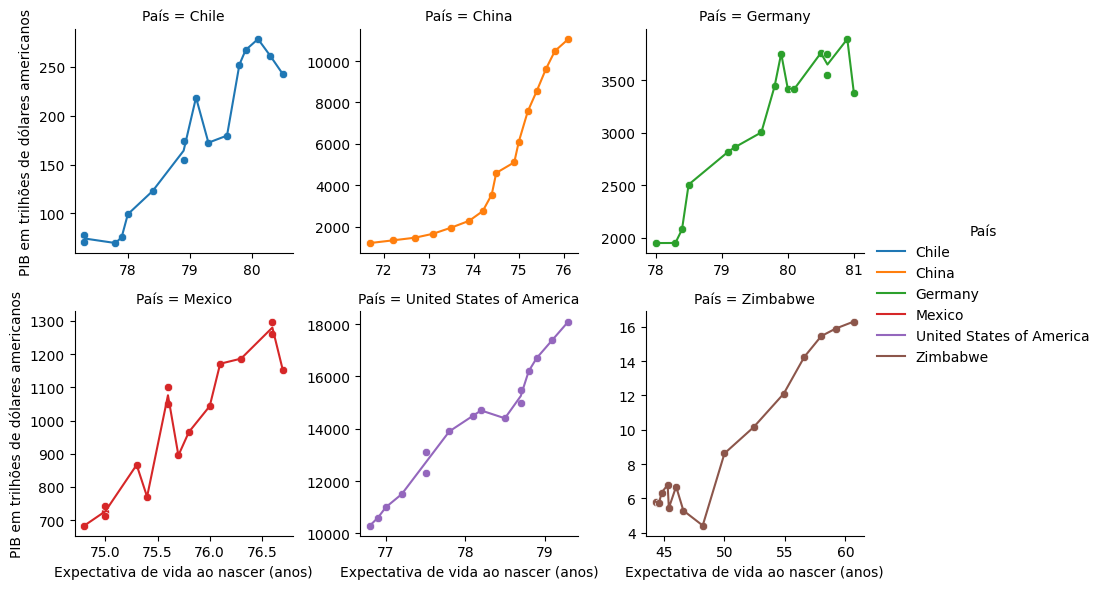

In [48]:
g = sns.FacetGrid(data=df,
                  col="País",
                  col_wrap=3,
                  hue = "País",
                  palette="tab10",
                  sharey = False, 
                  sharex = False)
g = (g.map(sns.scatterplot, "EV", "PIB_Bi")
        .map(sns.lineplot, "EV", "PIB_Bi", errorbar=None, linestyle="-") 
        .add_legend()
        .set_axis_labels("Expectativa de vida ao nascer (anos)", "PIB em trilhões de dólares americanos"))

plt.show()

Assim como nos gráficos anteriores, os países são separados em cada gráfico de dispersão por facetas. Observando os países individualmente, a maioria deles, como os EUA, o México e o _Zimbabwe_, apresenta relações lineares entre PIB e expectativa de vida. A China, por outro lado, apresenta uma curva levemente exponencial, e o gráfico do Chile parece ter um comportamento um pouco logarítmico. De maneira geral, pode-se observar um aumento no PIB e na expectativa de vida, exibindo uma correlação positiva.

### Conclusão

**Respostas às Perguntas**

- A expectativa de vida aumentou ao longo do tempo nas seis nações?
    - Sim, com base no gráfico "Expectativa de Vida durante 2000-2015 de cada País", a expectativa de vida aumentou para todos os seis países ao longo do tempo.

- O PIB aumentou ao longo do tempo nas seis nações?
    - Sim, com base no gráfico "PIB durante 2000-2015 de cada País", o PIB aumentou para todos os países, especialmente para a China.

- Existe uma correlação entre o PIB e a expectativa de vida de um país?
    - Sim, com base na análise do gráfico "Correlação entre PIB e Expectativa de Vida", observamos uma correlação positiva: países com PIB mais alto tendem a ter uma expectativa de vida mais alta.

- Qual é a expectativa média de vida nestas nações?
    - A expectativa média de vida é entre 74 e 78 anos para a maioria dos países, exceto Zimbabwe, com uma média de cerca de 50 anos.

- Qual é a distribuição dessa expectativa de vida?
    - A distribuição da expectativa de vida é assimétrica para a esquerda, com a maioria dos valores concentrados na faixa mais alta.

**Conclusão Geral**

Em resumo, a análise dos dados revela que tanto a expectativa de vida quanto o PIB aumentaram para os seis países ao longo do período de 2000 a 2015. A correlação positiva entre PIB e expectativa de vida indica que países com maior PIB tendem a oferecer melhores condições de vida para seus cidadãos, resultando em uma expectativa de vida mais alta. A expectativa média de vida está, em geral, na faixa dos 74 a 78 anos para a maioria dos países, com uma distribuição que é assimétrica para a esquerda, mostrando que a maioria dos dados está concentrada em valores mais altos.

Este estudo destaca a importância do crescimento econômico para a melhoria da qualidade de vida e sugere que políticas que promovam o aumento do PIB podem também contribuir para o aumento da expectativa de vida.